In [ ]:
# !pip install gensim

In [ ]:
# !pip install numpy

In [2]:
import numpy as np
import gensim

In [ ]:
# !pip install datasets

In [ ]:
# pip install ipywidgets

In [3]:
from datasets import load_dataset

dataset = load_dataset("ms_marco", "v2.1",split={'train': 'train[:100000]', 'validation': 'validation[:100000]','test': 'test[:100000]'})

In [4]:
dataset['train'].shape

(100000, 6)

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['answers', 'passages', 'query', 'query_id', 'query_type', 'wellFormedAnswers'],
        num_rows: 100000
    })
})

In [10]:
dataset['train'][39]

{'answers': ['A Jeep Compass Alternator Replacement is between $377 and $577.'],
 'passages': {'is_selected': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'passage_text': ['The average cost for a Jeep Compass Alternator Replacement is between $377 and $577. Labor costs are estimated between $123 and $156 while parts are priced between $254 and $421. Estimate does not include taxes and fees. Get a Personalized Estimate for your Jeep Compass.',
   'Well if a alt from autozone costs $150 any shop(and I mean any) will mark that up to $200 or or more(standard is 150% of cost) and then you got labor added on top of that and most labor charges are $80-$120 per hour depending on location.Then you got the diag fees to test the vehicle to find out what is wrong.',
   "Hi All: Am I out of touch with the cost to replace an alternator on a Lyberty? A local shop just charged my mother $350 to put in a new one. The Jeep was running and starting just fine, it seems they told her she needed a new one. She's 76. T

In [11]:
dataset = dataset.remove_columns(['answers', 'wellFormedAnswers', 'query_type'])

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
})

In [18]:
dataset['train'][63]

{'passages': {'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  'passage_text': ["Garcinia cambogia, a tropical fruit also known as the Malabar tamarind, is a popular weight-loss supplement.People say it blocks your body's ability to make fat and it puts the brakes on your appetite. It could help keep blood sugar and cholesterol levels in check, too.arcinia cambogia may make it easier for your body to use glucose, the sugar your cells need for energy. Mice that got garcinia cambogia in one study had lower insulin levels than mice that didn't. That's another reason, besides weight loss, that people with diabetes are interested in it.",
   'The extracts from the fruit of the Garcinia cambogia plant are marketed for weight loss -- either by themselves or in combination with other ingredients.The fruit of this tropical plant is rich in an active substance classified as hydroxycitric acid.he extracts from the fruit of the Garcinia cambogia plant are marketed for weight loss -- either by them

In [14]:
def clean_passages(examples):
    return {
        'passage_text': examples['passages']['passage_text'],
        'is_selected': examples['passages']['is_selected']
    }

dataset = dataset.map(lambda x: {
    'query': x['query'],
    'query_id': x['query_id'],
    'passages': clean_passages(x)
})

In [17]:
dataset['train'][63]

{'passages': {'is_selected': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  'passage_text': ["Garcinia cambogia, a tropical fruit also known as the Malabar tamarind, is a popular weight-loss supplement.People say it blocks your body's ability to make fat and it puts the brakes on your appetite. It could help keep blood sugar and cholesterol levels in check, too.arcinia cambogia may make it easier for your body to use glucose, the sugar your cells need for energy. Mice that got garcinia cambogia in one study had lower insulin levels than mice that didn't. That's another reason, besides weight loss, that people with diabetes are interested in it.",
   'The extracts from the fruit of the Garcinia cambogia plant are marketed for weight loss -- either by themselves or in combination with other ingredients.The fruit of this tropical plant is rich in an active substance classified as hydroxycitric acid.he extracts from the fruit of the Garcinia cambogia plant are marketed for weight loss -- either by them

In [16]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

dataset = dataset.map(lambda x: {
    'passages': {
        'passage_text': [preprocess_text(t) for t in x['passages']['passage_text']],
        'is_selected': x['passages']['is_selected']
    },
    'query': preprocess_text(x['query'])
})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
dataset

DatasetDict({
    train: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
    validation: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['passages', 'query', 'query_id'],
        num_rows: 100000
    })
})

In [19]:
dataset['train'][16]

{'passages': {'is_selected': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  'passage_text': ['oklahoma natural gas oklahoma city toll free customer service phone number  1 8006645463 bancfirst toll free customer service phone number  1405 9487930 click to enter your compliant for bancfirst oklahoma',
   'the customer support phone number of bancfirst is 1405 9487930 18558899216 18882009149 click phone number to call dataadslot7829909793 bancfirst oklahoma customer service phone number bancfirst customer service phone number phone number of bancfirst is 1405 9487930 18558899216 18882009149 bancfirst corporation or bancfirst is a public financial institution serves the residents of the united states it is an oklahoma state charted financial institution it is counted among the leading financial institutions throughout the state',
   'bancfirst customer support service phone number the customer support phone number of bancfirst is 1405 9487930 18558899216 18882009149 click phone number to call the post

In [ ]:
import nltk
nltk.download('punkt', force=True)
nltk.download('punkt_tab', force=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np

nltk.download('punkt')

all_passages = [
    passage
    for sample in dataset['train']
    for passage in sample['passages']['passage_text']
]

tokenized_passages = [word_tokenize(p.lower()) for p in all_passages]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(
    sentences=tokenized_passages,  
    vector_size=300,               
    window=5,                      
    min_count=5,                   
    workers=4,                     
    epochs=10                      
)

w2v_model.save("word2vec_model.model")

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec.load("word2vec_model.model")

In [ ]:
def get_doc_embedding(tokens):
    embeddings = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(300)

passage_metadata = []
for doc_id, sample in enumerate(dataset['train']):
    for passage_num in range(len(sample['passages']['passage_text'])):
        passage_metadata.append((doc_id, passage_num))


In [ ]:
doc_embeddings = np.array([
    get_doc_embedding(word_tokenize(p.lower()))
    for p in all_passages
])

np.save("doc_embeddings.npy", doc_embeddings)
doc_embeddings=np.load("doc_embeddings.npy")

In [37]:
!pip install faiss-cpu

In [ ]:
import faiss
doc_embeddings = np.asarray(doc_embeddings, dtype=np.float32)
faiss.normalize_L2(doc_embeddings)

index = faiss.IndexFlatIP(300)
index.add(doc_embeddings.astype('float32'))

In [50]:
!pip install sentence_transformers

In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from rank_bm25 import BM25Okapi
from tqdm import tqdm

bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# ---------------- Word2Vec Search ----------------
def search(query, top_k):
    query_tokens = word_tokenize(query.lower())
    query_embedding = get_doc_embedding(query_tokens).reshape(1, -1)


    query_embedding = query_embedding.astype(np.float32)
    faiss.normalize_L2(query_embedding)

    distances, indices = index.search(query_embedding, top_k)

    results = []
    for idx, score in zip(indices[0], distances[0]):
        doc_id, passage_num = passage_metadata[idx]
        original_sample = dataset['train'][doc_id]
        results.append({
            'faiss_index': idx,  
            'passage': original_sample['passages']['passage_text'][passage_num],
            'score': float(score),
            'is_selected': original_sample['passages']['is_selected'][passage_num],
            'query_id': original_sample['query_id']
        })
    return results

# ---------------- BERT Re-ranking ----------------
def hybrid_search(query, top_k=10):
    initial_results = search(query, top_k=100)
    candidate_passages = [res['passage'] for res in initial_results]
    
    query_embedding = bert_model.encode([query])
    passage_embeddings = bert_model.encode(candidate_passages)
    
    scores = np.dot(passage_embeddings, query_embedding.T).flatten()
    top_indices = np.argsort(scores)[-top_k:][::-1]
    
    return [initial_results[i] for i in top_indices]

# ---------------- BM25 Re-ranking ----------------
def bm25_rerank(query, top_k=10):
    initial_results = search(query, top_k=100)
    tokenized_passages = [word_tokenize(p.lower()) for p in [res['passage'] for res in initial_results]]
    
    bm25 = BM25Okapi(tokenized_passages)
    tokenized_query = word_tokenize(query.lower())
    scores = bm25.get_scores(tokenized_query)
    
    top_indices = np.argsort(scores)[-top_k:][::-1]
    return [initial_results[i] for i in top_indices]

# ---------------- Metrics ----------------
def compute_metrics(results_list, k=10):
    mrr_total, recall_total, ndcg_total = 0.0, 0.0, 0.0
    count = 0

    for results in results_list:
        relevances = [r['is_selected'] for r in results[:k]]
        
        mrr = 0.0
        for rank, rel in enumerate(relevances, 1):
            if rel:
                mrr = 1.0 / rank
                break

        recall = int(any(relevances))

        dcg = sum((rel / np.log2(i + 2)) for i, rel in enumerate(relevances))
        idcg = sum((1.0 / np.log2(i + 2)) for i in range(sum(relevances)))
        ndcg = dcg / idcg if idcg > 0 else 0.0
        
        mrr_total += mrr
        recall_total += recall
        ndcg_total += ndcg
        count += 1

    return {
        'MRR@{}'.format(k): mrr_total / count,
        'Recall@{}'.format(k): recall_total / count,
        'NDCG@{}'.format(k): ndcg_total / count
    }

# ---------------- Evaluation ----------------
def evaluate(dataset_split, num_queries=100):
    queries = dataset[dataset_split].select(range(num_queries))

    word2vec_results, bert_results, bm25_results = [], [], []

    for sample in tqdm(queries):
        query = sample['query']
        qid = sample['query_id']

        word2vec_results.append(search(query, top_k=10))
        bert_results.append(hybrid_search(query, top_k=10))
        bm25_results.append(bm25_rerank(query, top_k=10))

    print("Word2Vec Ranking")
    print(compute_metrics(word2vec_results))

    print("Word2Vec + BERT Re-ranking")
    print(compute_metrics(bert_results))

    print("Word2Vec + BM25 Re-ranking")
    print(compute_metrics(bm25_results))


def evaluate_models(dataset, top_k=10, st=0, stop=100):
    
    queries = dataset.select(range(st,stop))

    word2vec_results = []
    bert_results = []
    bm25_results = []

    for sample in tqdm(queries, desc="Processing queries"):
        query = sample['query']
        word2vec_results.append(search(query, top_k))
        bert_results.append(hybrid_search(query, top_k))
        bm25_results.append(bm25_rerank(query, top_k))

    print("Word2Vec Results:")
    print(compute_metrics(word2vec_results, k=top_k))

    print("Word2Vec + BERT Results:")
    print(compute_metrics(bert_results, k=top_k))

    print("Word2Vec + BM25 Results:")
    print(compute_metrics(bm25_results, k=top_k))

if __name__ == "__main__":
    evaluate_models(dataset['validation'], top_k=10, st=0, stop=100)


In [53]:
# if __name__ == "__main__":
#     evaluate_models(dataset['validation'], top_k=10, st=100, stop=200)

In [54]:
# if __name__ == "__main__":
#     evaluate_models(dataset['validation'], top_k=10, st=200, stop=300)

In [55]:
# if __name__ == "__main__":
#     evaluate_models(dataset['validation'], top_k=10, st=300, stop=400)

In [56]:
# if __name__ == "__main__":
#     evaluate_models(dataset['validation'], top_k=10, st=400, stop=500)

In [57]:
# if __name__ == "__main__":
#     evaluate_models(dataset['test'], top_k=10, st=0, stop=100)

In [58]:
# if __name__ == "__main__":
#     evaluate_models(dataset['test'], top_k=10, st=100, stop=200)

In [59]:
# if __name__ == "__main__":
#     evaluate_models(dataset['test'], top_k=10, st=200, stop=300)

In [60]:
# if __name__ == "__main__":
#     evaluate_models(dataset['test'], top_k=10, st=300, stop=400)

In [61]:
# if __name__ == "__main__":
#     evaluate_models(dataset['test'], top_k=10, st=400, stop=500)

In [ ]:
def evaluate_hit_rate(models, queries, top_k=5):
    results = {name: [] for name in models}
    
    for query in queries:
        for name, search_fn in models.items():
            try:
                res = search_fn(query, top_k)
                results[name].append(any(r['is_selected'] for r in res))
            except Exception as e:
                print(f"Error in {name} for query '{query[:50]}...': {e}")
                results[name].append(False)
    
    return {name: sum(hits)/len(hits) for name, hits in results.items()}

validation_queries = [
    sample['query'] 
    for sample in dataset['validation'].shuffle(seed=42).select(range(100))
]

models_to_evaluate = {
    'Word2Vec': search,
    'Hybrid': hybrid_search,
    'Word2Vec + BM25': bm25_rerank 
}

hit_rates = evaluate_hit_rate(models_to_evaluate, validation_queries, top_k=5)

print(f"{'Model':<15} | {'Hit Rate@5':<10}")
print("-"*27)
for name, rate in hit_rates.items():
    print(f"{name:<15} | {rate:.3f}")


Model           | Hit Rate@5
---------------------------
Word2Vec        | 0.310
Hybrid          | 0.280
Word2Vec + BM25 | 0.260


In [ ]:
def compare_top_results(query, models, top_k=3):
    
    print(f"\nQuery: {query}")
    for name, search_fn in models.items():
        results = search_fn(query, top_k)
        print(f"\n{name} Results:")
        for i, res in enumerate(results, 1):
            status = "RELEVANT" if res['is_selected'] else "IRRELEVANT"
            print(f"{i}. [{status}] {res['passage'][:500]}...")

models_to_evaluate = {
    'Word2Vec': search,
    'Hybrid': hybrid_search,
    'Word2Vec + BM25': bm25_rerank
}

sample_query = "what was the immediate impact of the success of the manhattan project?"
compare_top_results(sample_query, models_to_evaluate)



Query: what was the immediate impact of the success of the manhattan project?

Word2Vec Results:
1. [RELEVANT] the presence of communication amid scientific minds was equally important to the success of the manhattan project as scientific intellect was the only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant hundreds of thousands of innocent lives obliterated...
2. [IRRELEVANT] the legacy of the new deal in the 20th century includes  the central importance of the president in the political life and action of the countrythe transition of the federal govt to the role of a broker statethe creation of a safety net for the average american during economic crisis...
3. [RELEVANT] sandman is a member of the hoods incarnation of the masters of evil in this universe he was instrumental for the success of most of the hoods heists and the infiltration of the red guards hellicarier and rescue of captured teammates...

Hybrid 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_relevant_embeddings(sample, model_type, sample_index):
    
    relevant_embeddings = []
    relevant_indices = [i for i, selected in enumerate(sample['passages']['is_selected']) if selected]
    
    for passage_num in relevant_indices:
        if model_type == 'word2vec':
    
            global_idx = sample_index * 10 + passage_num
            relevant_embeddings.append(doc_embeddings[global_idx])
        elif model_type == 'bert':
            passage_text = sample['passages']['passage_text'][passage_num]
            relevant_embeddings.append(bert_model.encode([passage_text])[0])
            
    return np.array(relevant_embeddings)

def calculate_similarity_metrics(sample, model_type, sample_index, top_k=10):
    
    embedding_type = 'word2vec' if model_type == 'bm25' else model_type
    relevant_embs = get_relevant_embeddings(sample, embedding_type, sample_index)
    
    if len(relevant_embs) == 0:
        return None 
    
    if model_type == 'word2vec':
        results = search(sample['query'], top_k)
        result_embs = [doc_embeddings[res['faiss_index']] for res in results]
    elif model_type == 'bert':
        results = hybrid_search(sample['query'], top_k)
        result_embs = bert_model.encode([res['passage'] for res in results])
    elif model_type == 'bm25':
        results = bm25_rerank(sample['query'], top_k)
        result_embs = [doc_embeddings[res['faiss_index']] for res in results]
    
    similarity_matrix = cosine_similarity(result_embs, relevant_embs)
    
    return {
        'max_similarity': np.max(similarity_matrix),
        'mean_similarity': np.mean(similarity_matrix),
        'min_similarity': np.min(similarity_matrix),
        'top1_similarity': np.mean(similarity_matrix[0]),
        'relevant_count': len(relevant_embs)
    }

metrics = {'word2vec': [], 'hybrid': [], 'bm25': []}

validation_samples = dataset['validation'].select(range(100))

for sample_index, sample in enumerate(validation_samples):
    
    w2v_metrics = calculate_similarity_metrics(sample, 'word2vec', sample_index)
    if w2v_metrics:
        metrics['word2vec'].append(w2v_metrics)
    
    hybrid_metrics = calculate_similarity_metrics(sample, 'bert', sample_index)
    if hybrid_metrics:
        metrics['hybrid'].append(hybrid_metrics)
    
    bm25_metrics = calculate_similarity_metrics(sample, 'bm25', sample_index)
    if bm25_metrics:
        metrics['bm25'].append(bm25_metrics)

def aggregate_metrics(metric_list):
    return {
        'mean_max_sim': np.mean([m['max_similarity'] for m in metric_list]),
        'mean_avg_sim': np.mean([m['mean_similarity'] for m in metric_list]),
        'mean_top1_sim': np.mean([m['top1_similarity'] for m in metric_list]),
        'queries_with_relevant': len(metric_list)
    }

print("Word2Vec Performance:")
print(aggregate_metrics(metrics['word2vec']))

print("\nHybrid Model Performance:")
print(aggregate_metrics(metrics['hybrid']))

print("\nBM25 Model Performance:")
print(aggregate_metrics(metrics['bm25']))

Word2Vec Performance:
{'mean_max_sim': 0.3929975, 'mean_avg_sim': 0.29179117, 'mean_top1_sim': 0.28023434, 'queries_with_relevant': 38}

Hybrid Model Performance:
{'mean_max_sim': 0.56939685, 'mean_avg_sim': 0.42452034, 'mean_top1_sim': 0.4960085, 'queries_with_relevant': 38}

BM25 Model Performance:
{'mean_max_sim': 0.41741914, 'mean_avg_sim': 0.30493867, 'mean_top1_sim': 0.3135446, 'queries_with_relevant': 38}


In [ ]:
sample_index = 0  
sample = dataset['validation'][sample_index]
print("Query:", sample['query'])

w2v_metrics = calculate_similarity_metrics(sample, 'word2vec', sample_index)
hybrid_metrics = calculate_similarity_metrics(sample, 'bert', sample_index)
bm25_metrics = calculate_similarity_metrics(sample, 'bm25', sample_index)

if w2v_metrics:
    print(f"\nWord2Vec Max Similarity: {w2v_metrics['max_similarity']:.3f}, Mean: {w2v_metrics['mean_similarity']:.3f}")
if hybrid_metrics:
    print(f"Hybrid Max Similarity: {hybrid_metrics['max_similarity']:.3f}, Mean: {hybrid_metrics['mean_similarity']:.3f}")
if bm25_metrics:
    print(f"BM25 Max Similarity: {bm25_metrics['max_similarity']:.3f}, Mean: {bm25_metrics['mean_similarity']:.3f}")

Query:  what is a corporation

Word2Vec Max Similarity: 0.427, Mean: 0.344
Hybrid Max Similarity: 0.580, Mean: 0.496
BM25 Max Similarity: 0.441, Mean: 0.337


In [74]:
import pandas as pd

data = [
    [1, 'Word2Vec', 0.1411, 0.45, 0.2166],
    [1, 'Word2Vec + BERT', 0.1979, 0.52, 0.2787],
    [1, 'Word2Vec + BM25', 0.1266, 0.37, 0.1821],

    [2, 'Word2Vec', 0.1688, 0.45, 0.2267],
    [2, 'Word2Vec + BERT', 0.1703, 0.47, 0.2397],
    [2, 'Word2Vec + BM25', 0.1633, 0.48, 0.2330],

    [3, 'Word2Vec', 0.1293, 0.39, 0.1891],
    [3, 'Word2Vec + BERT', 0.1587, 0.49, 0.2402],
    [3, 'Word2Vec + BM25', 0.1571, 0.48, 0.2308],

    [4, 'Word2Vec', 0.1768, 0.5, 0.2488],
    [4, 'Word2Vec + BERT', 0.2142, 0.55, 0.2856],
    [4, 'Word2Vec + BM25', 0.1925, 0.54, 0.2778],

    [5, 'Word2Vec', 0.1652, 0.51, 0.2495],
    [5, 'Word2Vec + BERT', 0.2280, 0.53, 0.2985],
    [5, 'Word2Vec + BM25', 0.1810, 0.49, 0.2485],

    [6, 'Word2Vec', 0.1753, 0.48, 0.2455],
    [6, 'Word2Vec + BERT', 0.2319, 0.54, 0.2964],
    [6, 'Word2Vec + BM25', 0.1409, 0.44, 0.2156],

    [7, 'Word2Vec', 0.1565, 0.46, 0.2276],
    [7, 'Word2Vec + BERT', 0.2254, 0.62, 0.3203],
    [7, 'Word2Vec + BM25', 0.2174, 0.54, 0.2885],

    [8, 'Word2Vec', 0.1541, 0.42, 0.2187],
    [8, 'Word2Vec + BERT', 0.2188, 0.52, 0.2752],
    [8, 'Word2Vec + BM25', 0.1868, 0.48, 0.2491],

    [9, 'Word2Vec', 0.1330, 0.42, 0.1983],
    [9, 'Word2Vec + BERT', 0.1683, 0.54, 0.2573],
    [9, 'Word2Vec + BM25', 0.1446, 0.47, 0.2239],

    [10, 'Word2Vec', 0.1675, 0.42, 0.2227],
    [10, 'Word2Vec + BERT', 0.1693, 0.47, 0.2361],
    [10, 'Word2Vec + BM25', 0.1911, 0.49, 0.2549],
]
df = pd.DataFrame(data, columns=['Batch', 'Retrieval Setup', 'MRR@10', 'Recall@10', 'NDCG@10'])

display(df)


,Batch,Retrieval Setup,MRR@10,Recall@10,NDCG@10
0,1,Word2Vec,0.1411,0.45,0.2166
1,1,Word2Vec + BERT,0.1979,0.52,0.2787
2,1,Word2Vec + BM25,0.1266,0.37,0.1821
3,2,Word2Vec,0.1688,0.45,0.2267
4,2,Word2Vec + BERT,0.1703,0.47,0.2397
5,2,Word2Vec + BM25,0.1633,0.48,0.2330
6,3,Word2Vec,0.1293,0.39,0.1891
7,3,Word2Vec + BERT,0.1587,0.49,0.2402
8,3,Word2Vec + BM25,0.1571,0.48,0.2308
9,4,Word2Vec,0.1768,0.50,0.2488


In [75]:
summary_stats = df.groupby("Retrieval Setup").agg(
    MRR_mean=('MRR@10', 'mean'),
    MRR_std=('MRR@10', 'std'),
    Recall_mean=('Recall@10', 'mean'),
    Recall_std=('Recall@10', 'std'),
    NDCG_mean=('NDCG@10', 'mean'),
    NDCG_std=('NDCG@10', 'std'),
).round(4)

print("Summary statistics per retrieval setup:\n")
display(summary_stats)

Summary statistics per retrieval setup:



,MRR_mean,MRR_std,Recall_mean,Recall_std,NDCG_mean,NDCG_std
Retrieval Setup,,,,,,
Word2Vec,0.1568,0.0172,0.450,0.0386,0.2244,0.0203
Word2Vec + BERT,0.1983,0.0289,0.525,0.0440,0.2728,0.0287
Word2Vec + BM25,0.1701,0.0283,0.478,0.0485,0.2404,0.0307


c:\Users\Saharsh\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Saharsh\anaconda3\envs\myenv\lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


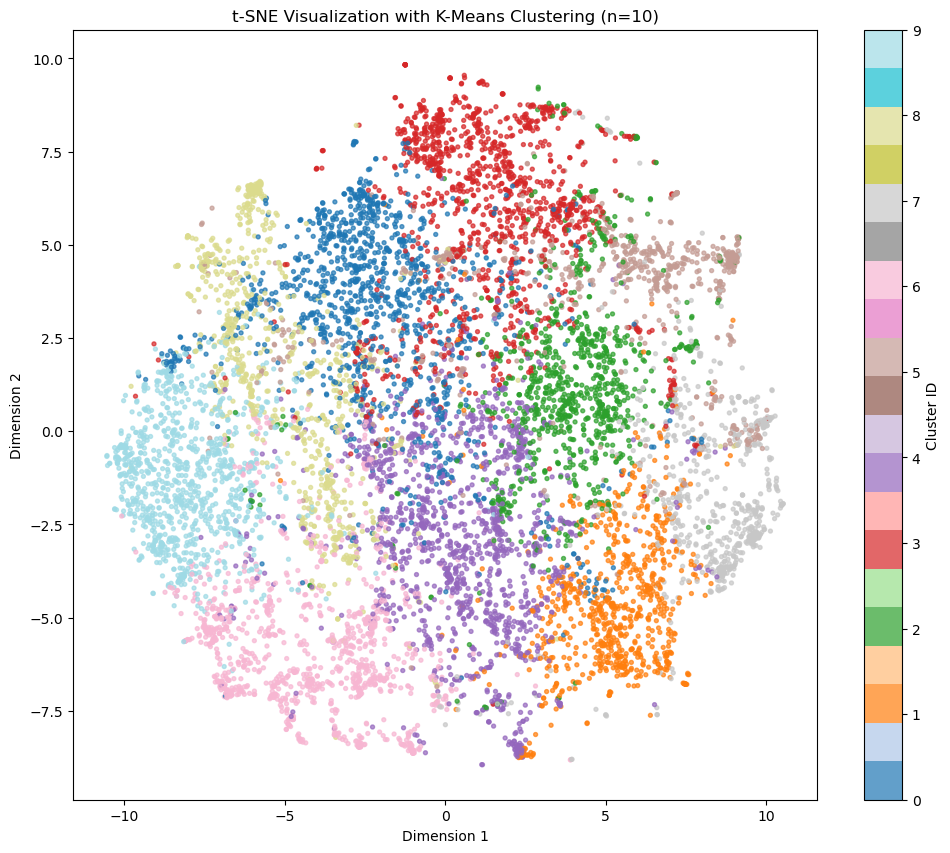


Cluster 0 samples:
- there are 3 main reasons why stalin wanted to control eastern europe 1 russia has historically no secure border 2 they wanted to set up satellite coun...
- what to do if i stepped on rusty nail prevent getting tetanus what to do if you step on a nail and are afraid to get tetanus tetanus vaccines are avai...
- just asked see more 1  what is the minimum coefficient of friction  answer 13 minutes ago 2  how do you find the derivate of inverse sin  answer 14 mi...

Cluster 1 samples:
- the manhattan project and its atomic bomb helped bring an end to world war ii its legacy of peaceful uses of atomic energy continues to have an impact...
- the manhattan project was the name for a project conducted during world war ii to develop the first atomic bomb it refers specifically to the period o...
- the manhattan project this once classified photograph features the first atomic bomb — a weapon that atomic scientists had nicknamed gadget the nuclea...

Cluster 2 samples:
- ve

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(doc_embeddings[:10000])

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
embeddings_2d = tsne.fit_transform(doc_embeddings[:10000])

plt.figure(figsize=(12, 10))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                     c=cluster_labels, cmap='tab20', s=8, alpha=0.7)
plt.title("t-SNE Visualization with K-Means Clustering (n=10)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(scatter, label='Cluster ID')
plt.show()

cluster_samples = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    cluster_samples[label].append(idx)

for cluster_id in range(min(5, n_clusters)):  
    sample_indices = cluster_samples[cluster_id][:3]  
    print(f"\nCluster {cluster_id} samples:")
    for idx in sample_indices:
        doc_id, passage_num = passage_metadata[idx]
        passage = dataset['train'][doc_id]['passages']['passage_text'][passage_num]
        print(f"- {passage[:150]}...")

cluster_stats = []
for cluster_id in range(n_clusters):
    cluster_embeddings = doc_embeddings[np.where(cluster_labels == cluster_id)]
    avg_similarity = np.mean(cluster_embeddings @ cluster_embeddings.T)
    cluster_stats.append({
        'Cluster': cluster_id,
        'Size': len(cluster_samples[cluster_id]),
        'Avg Similarity': avg_similarity
    })

df_stats = pd.DataFrame(cluster_stats)
print("\nCluster Statistics:")
print(df_stats.sort_values('Avg Similarity', ascending=False))

query_idx = 42  
query_cluster = cluster_labels[query_idx]
similar_docs = cluster_samples[query_cluster]

print(f"\nDocuments similar to index {query_idx} (Cluster {query_cluster}):")
for idx in similar_docs[:5]: 
    doc_id, passage_num = passage_metadata[idx]
    passage = dataset['train'][doc_id]['passages']['passage_text'][passage_num]
    print(f"- {passage[:150]}...")